# **Import librabies**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install imbalanced-learn
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Read data**

In [2]:
data = pd.read_csv('/content/bank-additional-full.csv',sep = ';')

In [3]:
df = data.copy()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

# **Desc**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Handle missing and duplicate data

In [6]:
# Checking for missing values
print("Is there any null values in the data ? \n",df.isnull().values.any())

Is there any null values in the data ? 
 False


In [7]:
# Checking for duplicated rows
df[df.duplicated(keep='first')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [8]:
# Remove duplicated rows
df.drop_duplicates(keep='first',inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [10]:
print('Discription of Numeric Data : ')
df.describe()

Discription of Numeric Data : 


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
print('Discription of Categorical Data : ')
df.describe(include='object')

Discription of Categorical Data : 


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


# **Data Preprocessing**

## Function

In [12]:
def barplot_mean(x, y, df, hue=None, order=None, hue_order=None):
    print(df.groupby(x)[y].mean())
    uniqs = df[x].nunique()
    
    if uniqs > 4:
        plt.figure(figsize=(16,4))
        
    sns.barplot(x=x, y=y, data=df, estimator=np.mean, hue=hue, order=order, hue_order=hue_order)
    plt.show()

In [13]:
int_column = df.dtypes[df.dtypes == 'int64'].index | df.dtypes[df.dtypes == 'float64'].index

In [14]:
df.replace({"y" : {"no" : 0, "yes" : 1}}, inplace=True)
df.y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int64

## Job

In [15]:
df.job.value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

job
admin.           0.129667
blue-collar      0.068951
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252619
self-employed    0.104856
services         0.081422
student          0.314286
technician       0.108325
unemployed       0.142012
unknown          0.112121
Name: y, dtype: float64


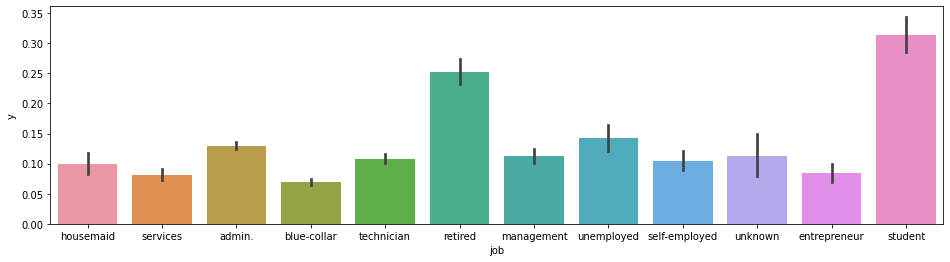

In [16]:
barplot_mean('job', 'y', df)

In [17]:
df.replace({"job" : {"unknown" : "admin."}}, inplace=True)

## Marital

In [18]:
df.marital.value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

marital
divorced    0.103231
married     0.101561
single      0.140090
unknown     0.150000
Name: y, dtype: float64


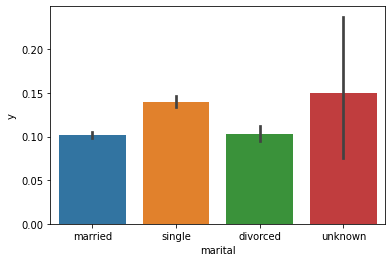

In [19]:
barplot_mean('marital', 'y', df)

In [20]:
df.replace({"marital" : {"unknown" : "single"}}, inplace=True)

## Education

In [21]:
df.education.value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

education
basic.4y               0.102490
basic.6y               0.082060
basic.9y               0.078246
high.school            0.108389
illiterate             0.222222
professional.course    0.113550
university.degree      0.137208
unknown                0.145087
Name: y, dtype: float64


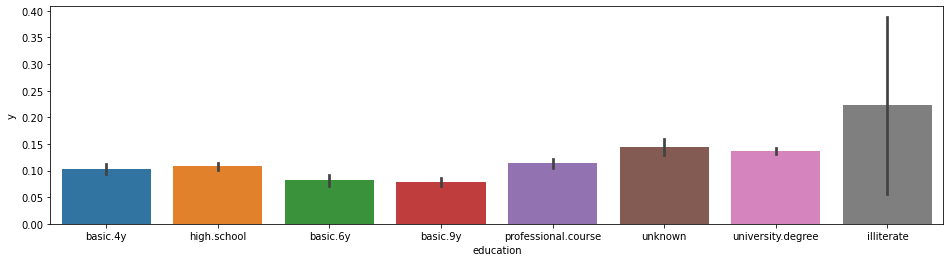

In [22]:
barplot_mean('education', 'y', df)

In [23]:
df.replace({'education' : {'unknown' : 'university.degree' }},inplace=True)
df.education.replace(['basic.4y', 'basic.6y', 'basic.9y'],'Basic', inplace=True)

## Default

In [24]:
df.default.value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

default
no         0.128803
unknown    0.051536
yes        0.000000
Name: y, dtype: float64


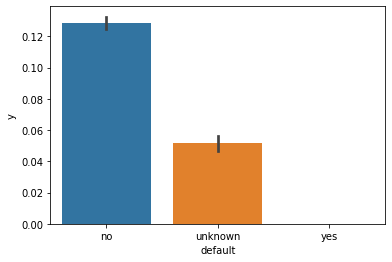

In [25]:
barplot_mean('default', 'y', df)

In [26]:
df.drop('default',axis=1,inplace=True)

## housing

In [27]:
df.housing.value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

housing
no         0.108783
unknown    0.108081
yes        0.116221
Name: y, dtype: float64


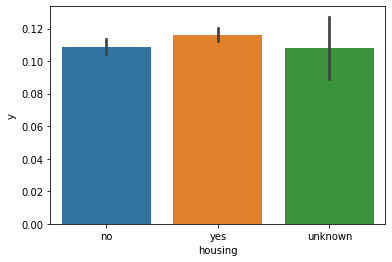

In [28]:
barplot_mean('housing', 'y', df)

In [29]:
df.replace({'housing' : {'unknown' : 'yes' }}, inplace=True)

## Loan

In [30]:
df.loan.value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

loan
no         0.113413
unknown    0.108081
yes        0.109315
Name: y, dtype: float64


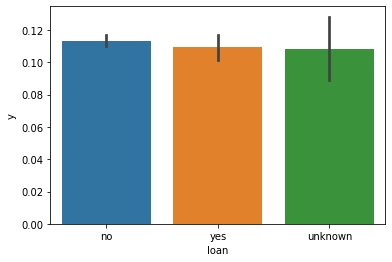

In [31]:
barplot_mean('loan', 'y', df)

In [32]:
df.replace({'loan' : {'unknown' : 'no'}}, inplace=True)

## Poutcome

In [33]:
df.poutcome.value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [34]:
df.y.value_counts()

0    36537
1     4639
Name: y, dtype: int64

poutcome
failure        0.142286
nonexistent    0.088324
success        0.651129
Name: y, dtype: float64


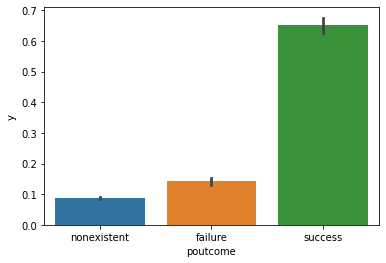

In [35]:
barplot_mean('poutcome', 'y', df)

## Handle some continuous variable

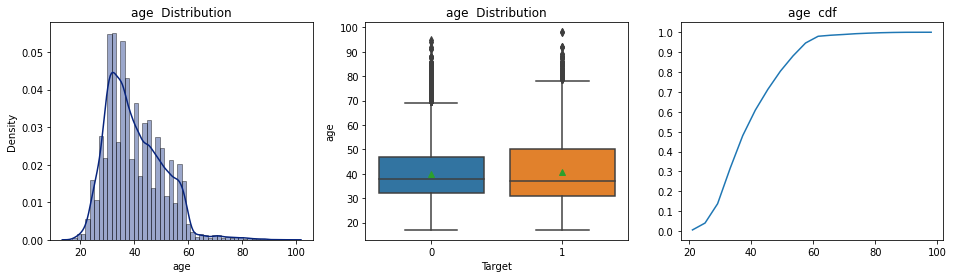

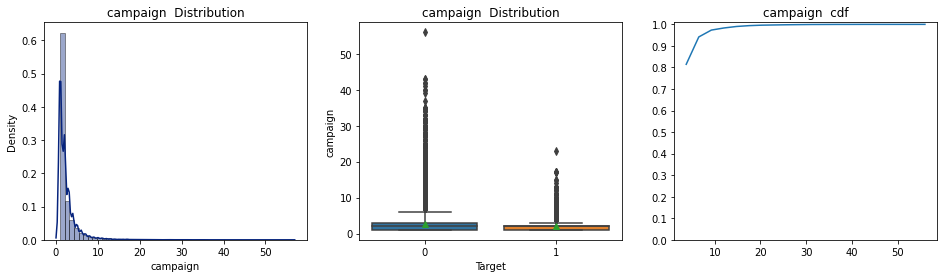

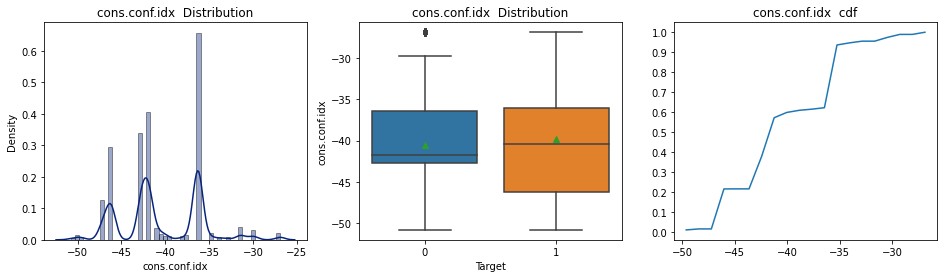

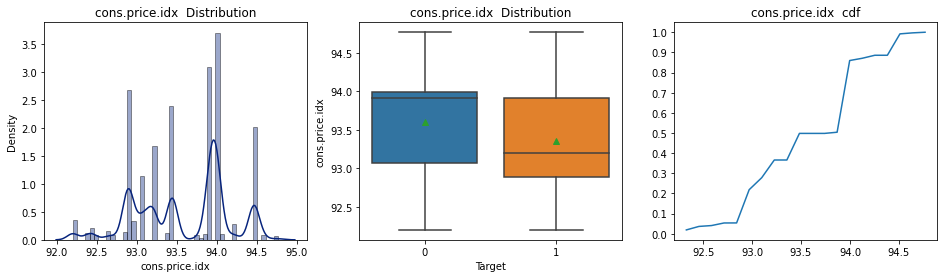

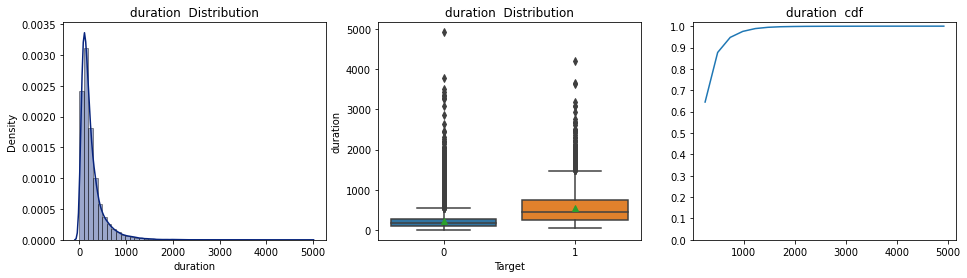

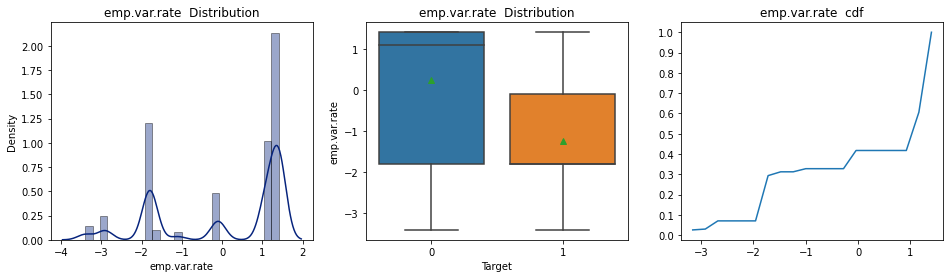

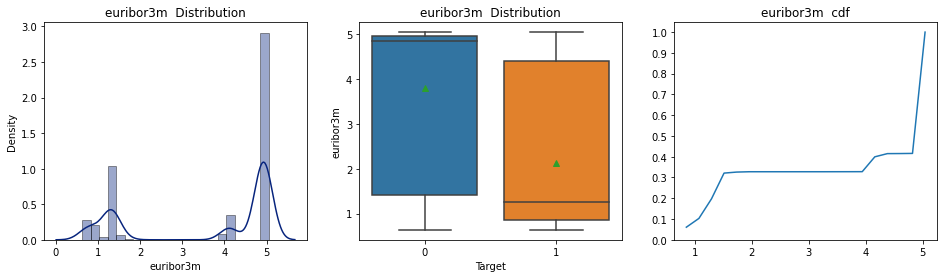

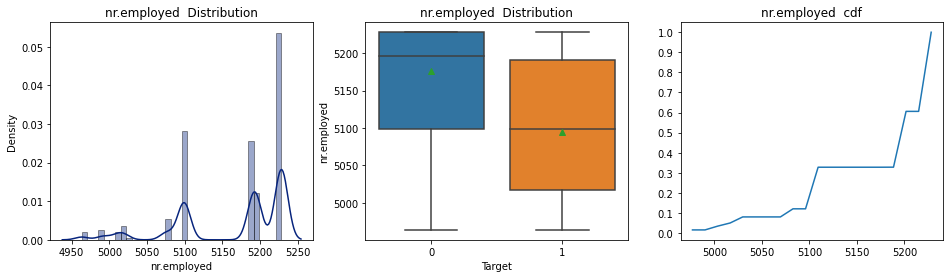

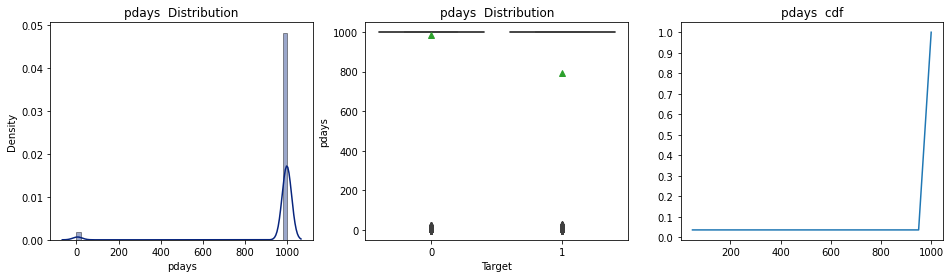

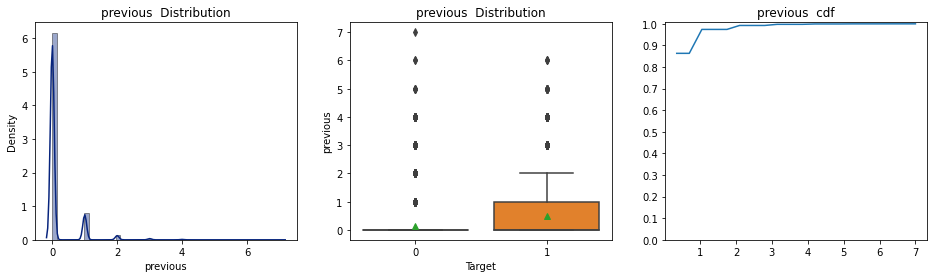

In [36]:
for column in int_column:
    plt.figure(figsize=(16,4))

    plt.subplot(1,3,1)
    sns.distplot(df[column], hist = True, color = "#07247D", hist_kws = {'edgecolor':'black'})
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'{column}  Distribution')

    plt.subplot(1,3,2)
    sns.boxplot(x='y', y=column, data =df, showmeans=True )
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.title(f'{column}  Distribution')

    plt.subplot(1,3,3)
    counts, bins = np.histogram(df[column], bins=20, normed=True)
    cdf = np.cumsum (counts)
    plt.plot (bins[1:], cdf/cdf[-1])
    #plt.xticks(range(15,100,5))
    plt.yticks(np.arange(0,1.1,.1))
    plt.title(f'{column}  cdf')
    plt.show()
    print()

Drop highly correlation features

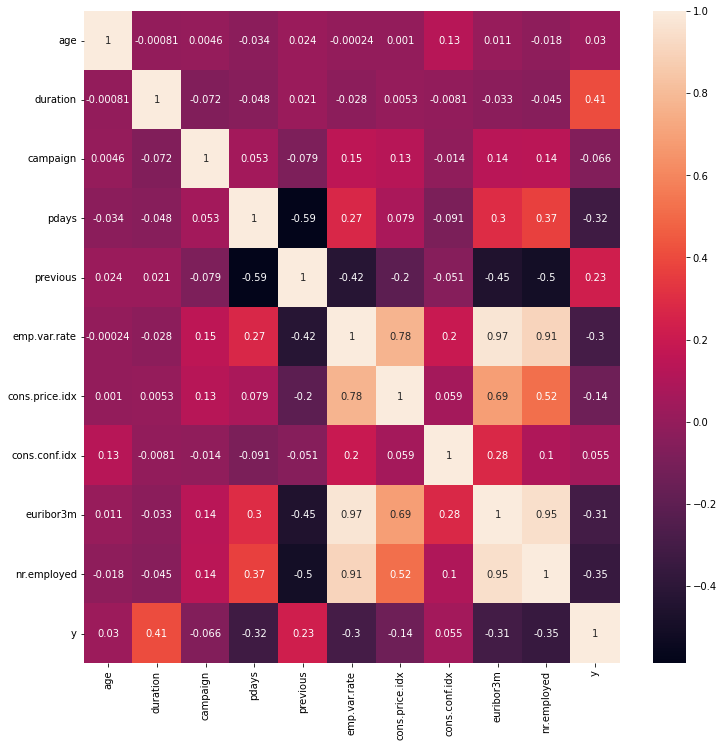

In [37]:
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.savefig('corr.png')
plt.show()
plt.close()

In [38]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

# Drop features
df.drop(to_drop, axis=1, inplace=True)

print('dropped features: ',to_drop)

dropped features:  ['cons.price.idx', 'euribor3m', 'nr.employed']


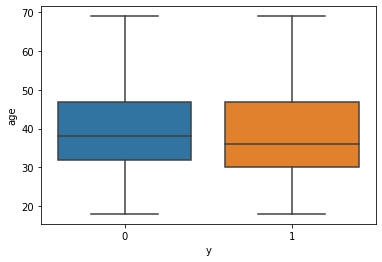

In [39]:
# Drop outlier in age feature
df.drop(df[df.age < 18].index, inplace=True)
df.drop(df[df.age > 69].index, inplace=True)
sns.boxplot(x='y',y='age',data=df)

## Drop the features related with the last contact of the current campaign

In [40]:
df.drop(['contact','month','day_of_week','duration','campaign'],axis=1,inplace=True)

## Encode target variable and other categorical variables in binary form

In [41]:
for col in df:
    if df[col].dtype == 'object':
      print('get_dummies columns: '+ col)
      df = pd.get_dummies(df, columns=[col],drop_first=True)

get_dummies columns: job
get_dummies columns: marital
get_dummies columns: education
get_dummies columns: housing
get_dummies columns: loan
get_dummies columns: poutcome


# **Train test split**

In [42]:
X = df.drop(columns=['y'])
y = df['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


# **Scaling data**

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train[['age', 'pdays', 'previous', 'emp.var.rate', 'cons.conf.idx']] = scaler.fit_transform(X_train[['age', 'pdays', 'previous', 'emp.var.rate', 'cons.conf.idx']])
X_test[['age', 'pdays', 'previous', 'emp.var.rate', 'cons.conf.idx']] = scaler.fit_transform(X_test[['age', 'pdays', 'previous', 'emp.var.rate', 'cons.conf.idx']])

# **Handle imbalance data**

In [44]:
df.y.value_counts()

0    36287
1     4416
Name: y, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

nm = NearMiss()
sm = SMOTE(random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)


# **Building model and evaluating**

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [63]:
y_test.value_counts()


0    7293
1     848
Name: y, dtype: int64

In [76]:
yes = y_test[y_test == 1].sum()
p = yes/y_test.count()
print('With y_test to get {} subscribers, we have to call {} people'.format(yes,y_test.count()))
print('Percent of subcriber: %.2f ' %(p*100))

With y_test to get 848 subscribers, we have to call 8141 people
Percent of subcriber: 10.42 


## **Logistic Regression**

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7293
           1       0.63      0.18      0.28       848

    accuracy                           0.90      8141
   macro avg       0.77      0.59      0.62      8141
weighted avg       0.88      0.90      0.88      8141



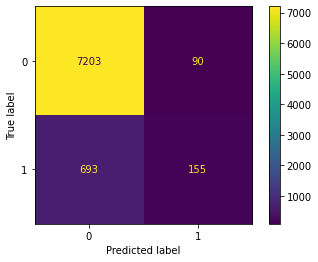

In [47]:
# Logistic Regression no Resample

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(classification_report( y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.close()

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      7293
           1       0.24      0.66      0.35       848

    accuracy                           0.74      8141
   macro avg       0.59      0.70      0.59      8141
weighted avg       0.88      0.74      0.79      8141



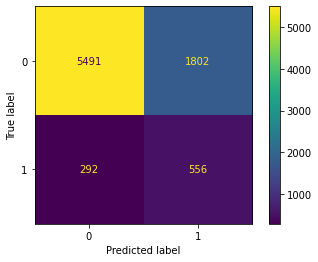

In [48]:
# Logistic Regression with SMOTE

logreg = LogisticRegression()
logreg.fit(X_train_sm, y_train_sm)

y_pred_sm = logreg.predict(X_test)

print(classification_report( y_test, y_pred_sm))
cm = confusion_matrix(y_test, y_pred_sm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.close()

              precision    recall  f1-score   support

           0       0.95      0.42      0.59      7293
           1       0.14      0.79      0.24       848

    accuracy                           0.46      8141
   macro avg       0.54      0.61      0.41      8141
weighted avg       0.86      0.46      0.55      8141



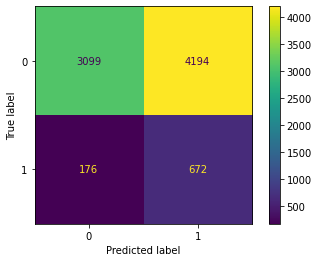

In [49]:
# Logistic Regression with NearMiss

logreg = LogisticRegression()
logreg.fit(X_train_nm, y_train_nm)

y_pred_nm = logreg.predict(X_test)

print(classification_report( y_test, y_pred_nm))
cm = confusion_matrix(y_test, y_pred_nm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.close()

## **Random Forest**

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7293
           1       0.45      0.30      0.36       848

    accuracy                           0.89      8141
   macro avg       0.68      0.63      0.65      8141
weighted avg       0.87      0.89      0.88      8141



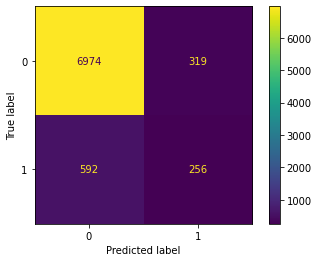

In [50]:
# RandomForest no Res

forest= RandomForestClassifier(random_state=42) 
forest.fit(X_train,y_train) 

y_pred = forest.predict(X_test)

print(classification_report( y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.close()

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7293
           1       0.33      0.46      0.38       848

    accuracy                           0.85      8141
   macro avg       0.63      0.67      0.65      8141
weighted avg       0.87      0.85      0.86      8141



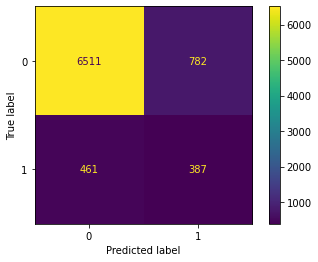

In [51]:
# RandomForest with SMOTE

forest= RandomForestClassifier(random_state=42) 
forest.fit(X_train_sm,y_train_sm) 

y_pred_sm = forest.predict(X_test)

print(classification_report( y_test, y_pred_sm))
cm = confusion_matrix(y_test, y_pred_sm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.close()

              precision    recall  f1-score   support

           0       0.94      0.18      0.30      7293
           1       0.11      0.89      0.20       848

    accuracy                           0.25      8141
   macro avg       0.52      0.54      0.25      8141
weighted avg       0.85      0.25      0.29      8141



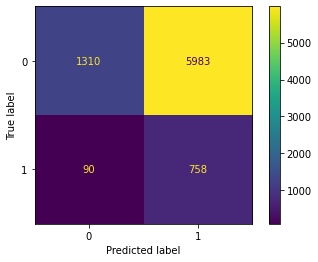

In [77]:
# Logistic Regression with NearMiss

forest= RandomForestClassifier(random_state=42) 
forest.fit(X_train_nm,y_train_nm) 

y_pred_nm = forest.predict(X_test)

print(classification_report( y_test, y_pred_nm))
cm = confusion_matrix(y_test, y_pred_nm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.close()

## **KNN**

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7293
           1       0.64      0.21      0.31       848

    accuracy                           0.91      8141
   macro avg       0.78      0.60      0.63      8141
weighted avg       0.89      0.91      0.88      8141



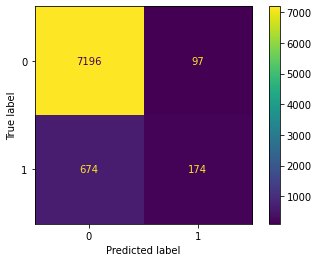

In [53]:
# KNN no Resample

knn_clf = KNeighborsClassifier(n_neighbors = 21)
knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

print(classification_report( y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.close()

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      7293
           1       0.22      0.59      0.32       848

    accuracy                           0.74      8141
   macro avg       0.58      0.67      0.58      8141
weighted avg       0.87      0.74      0.79      8141



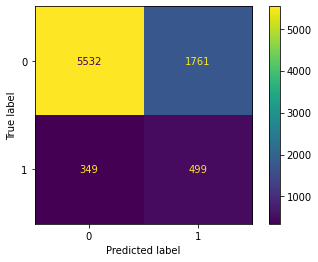

In [54]:
# KNN with SMOTE

knn_clf = KNeighborsClassifier(n_neighbors = 21)
knn_clf.fit(X_train_sm, y_train_sm)

y_pred_sm = knn_clf.predict(X_test)

print(classification_report( y_test, y_pred_sm))
cm = confusion_matrix(y_test, y_pred_sm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.close()

              precision    recall  f1-score   support

           0       0.94      0.42      0.58      7293
           1       0.14      0.78      0.23       848

    accuracy                           0.46      8141
   macro avg       0.54      0.60      0.41      8141
weighted avg       0.86      0.46      0.55      8141



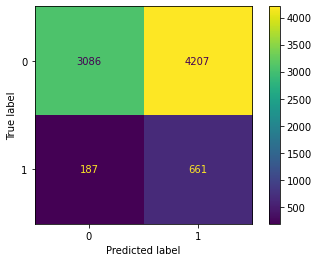

In [55]:
# KNN with NearMiss
knn_clf = KNeighborsClassifier(n_neighbors = 21)
knn_clf.fit(X_train_nm, y_train_nm)

y_pred_nm = knn_clf.predict(X_test)

print(classification_report( y_test, y_pred_nm))
cm = confusion_matrix(y_test, y_pred_nm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.close()

## **XGB**

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7293
           1       0.67      0.20      0.31       848

    accuracy                           0.91      8141
   macro avg       0.79      0.60      0.63      8141
weighted avg       0.89      0.91      0.88      8141



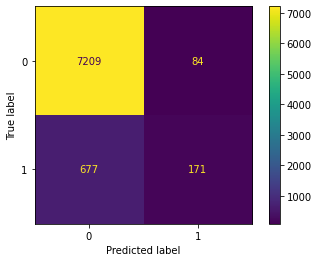

In [56]:
#XGB with no resample

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print(classification_report( y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.close()

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7293
           1       0.38      0.56      0.45       848

    accuracy                           0.86      8141
   macro avg       0.66      0.73      0.69      8141
weighted avg       0.89      0.86      0.87      8141



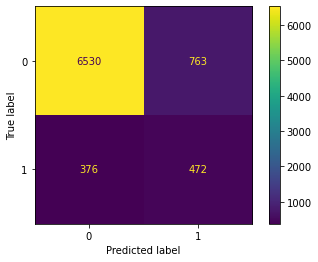

In [57]:
#XGB with SMOTE

import xgboost as xgb
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_sm, y_train_sm)

y_pred = xgb_clf.predict(X_test)

print(classification_report( y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.close()

              precision    recall  f1-score   support

           0       0.95      0.37      0.54      7293
           1       0.13      0.82      0.23       848

    accuracy                           0.42      8141
   macro avg       0.54      0.60      0.38      8141
weighted avg       0.86      0.42      0.50      8141



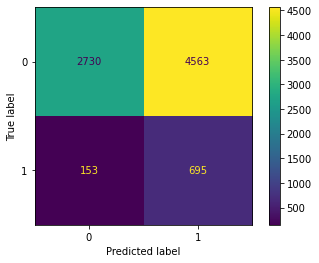

In [58]:
#XGB with NearMiss

import xgboost as xgb
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_nm, y_train_nm)

y_pred = xgb_clf.predict(X_test)

print(classification_report( y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.close()

## **SVM**

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7293
           1       0.65      0.20      0.31       848

    accuracy                           0.91      8141
   macro avg       0.78      0.59      0.63      8141
weighted avg       0.89      0.91      0.88      8141



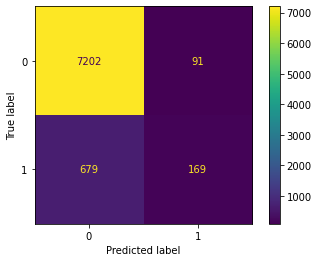

In [59]:
# SVM with no resample

svc_model = SVC()
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

print(classification_report( y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.close()

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      7293
           1       0.25      0.61      0.35       848

    accuracy                           0.77      8141
   macro avg       0.60      0.70      0.61      8141
weighted avg       0.87      0.77      0.80      8141



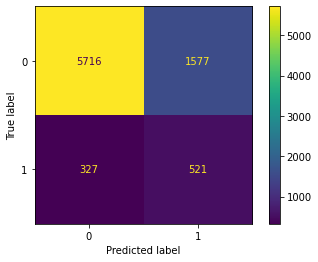

In [60]:
# SVM with SMOTE

svc_model = SVC()
svc_model.fit(X_train_sm, y_train_sm)

y_pred = svc_model.predict(X_test)

print(classification_report( y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.close()


              precision    recall  f1-score   support

           0       0.94      0.36      0.52      7293
           1       0.13      0.80      0.22       848

    accuracy                           0.41      8141
   macro avg       0.53      0.58      0.37      8141
weighted avg       0.86      0.41      0.49      8141



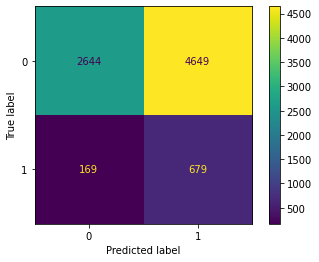

In [61]:
# SVM with NearMiss

svc_model = SVC()
svc_model.fit(X_train_nm, y_train_nm)

y_pred = svc_model.predict(X_test)

print(classification_report( y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.close()